In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
df = pd.read_csv('credit_risk_dataset.csv')

In [4]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [7]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [8]:
# Check missing values
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

<AxesSubplot:>

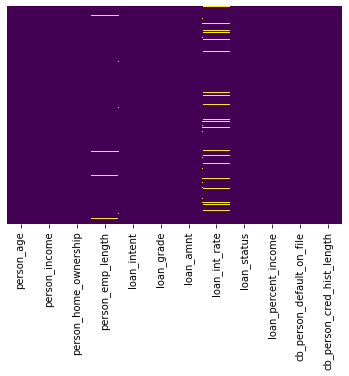

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
df['loan_int_rate'].value_counts()

7.51     756
10.99    749
7.49     645
7.88     642
5.42     594
        ... 
21.64      1
20.48      1
17.46      1
21.14      1
20.53      1
Name: loan_int_rate, Length: 348, dtype: int64

In [11]:
df['loan_int_rate'].mode()[0]

7.51

In [12]:
df['loan_int_rate']=df['loan_int_rate'].fillna(df['loan_int_rate'].mode()[0])

In [13]:
df['loan_int_rate'].isnull().sum()

0

In [14]:
df['person_emp_length'].unique()

array([123.,   5.,   1.,   4.,   8.,   2.,   6.,   7.,   0.,   9.,   3.,
        10.,  nan,  11.,  18.,  12.,  17.,  14.,  16.,  13.,  19.,  15.,
        20.,  22.,  21.,  24.,  23.,  26.,  25.,  27.,  28.,  31.,  41.,
        34.,  29.,  38.,  30.])

In [15]:
df['person_emp_length'].value_counts()

0.0      4105
2.0      3849
3.0      3456
5.0      2946
1.0      2915
4.0      2874
6.0      2666
7.0      2196
8.0      1687
9.0      1367
11.0      740
10.0      696
12.0      575
13.0      426
14.0      335
15.0      238
16.0      165
17.0      129
18.0      104
19.0       64
20.0       42
21.0       38
22.0       19
24.0       10
23.0       10
25.0        8
26.0        6
27.0        5
31.0        4
28.0        3
123.0       2
30.0        2
41.0        1
34.0        1
29.0        1
38.0        1
Name: person_emp_length, dtype: int64

In [16]:
df['person_emp_length'].mode()
df['person_emp_length'].mode()[0]

0    0.0
Name: person_emp_length, dtype: float64

0.0

In [17]:
df['person_emp_length']=df['person_emp_length'].fillna(df['person_emp_length'].mode()[0])

In [18]:
df['person_emp_length'].isnull().sum()

0

In [19]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [20]:
# handle the outlier
df.skew()

<ipython-input-20-02720e289e35>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


person_age                     2.581393
person_income                 32.865349
person_emp_length              2.564500
loan_amnt                      1.192477
loan_int_rate                  0.377698
loan_status                    1.364888
loan_percent_income            1.064669
cb_person_cred_hist_length     1.661790
dtype: float64

In [21]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

### Data Visualization

<AxesSubplot:>

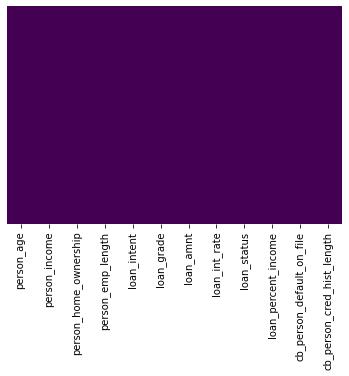

In [22]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Pair Plot

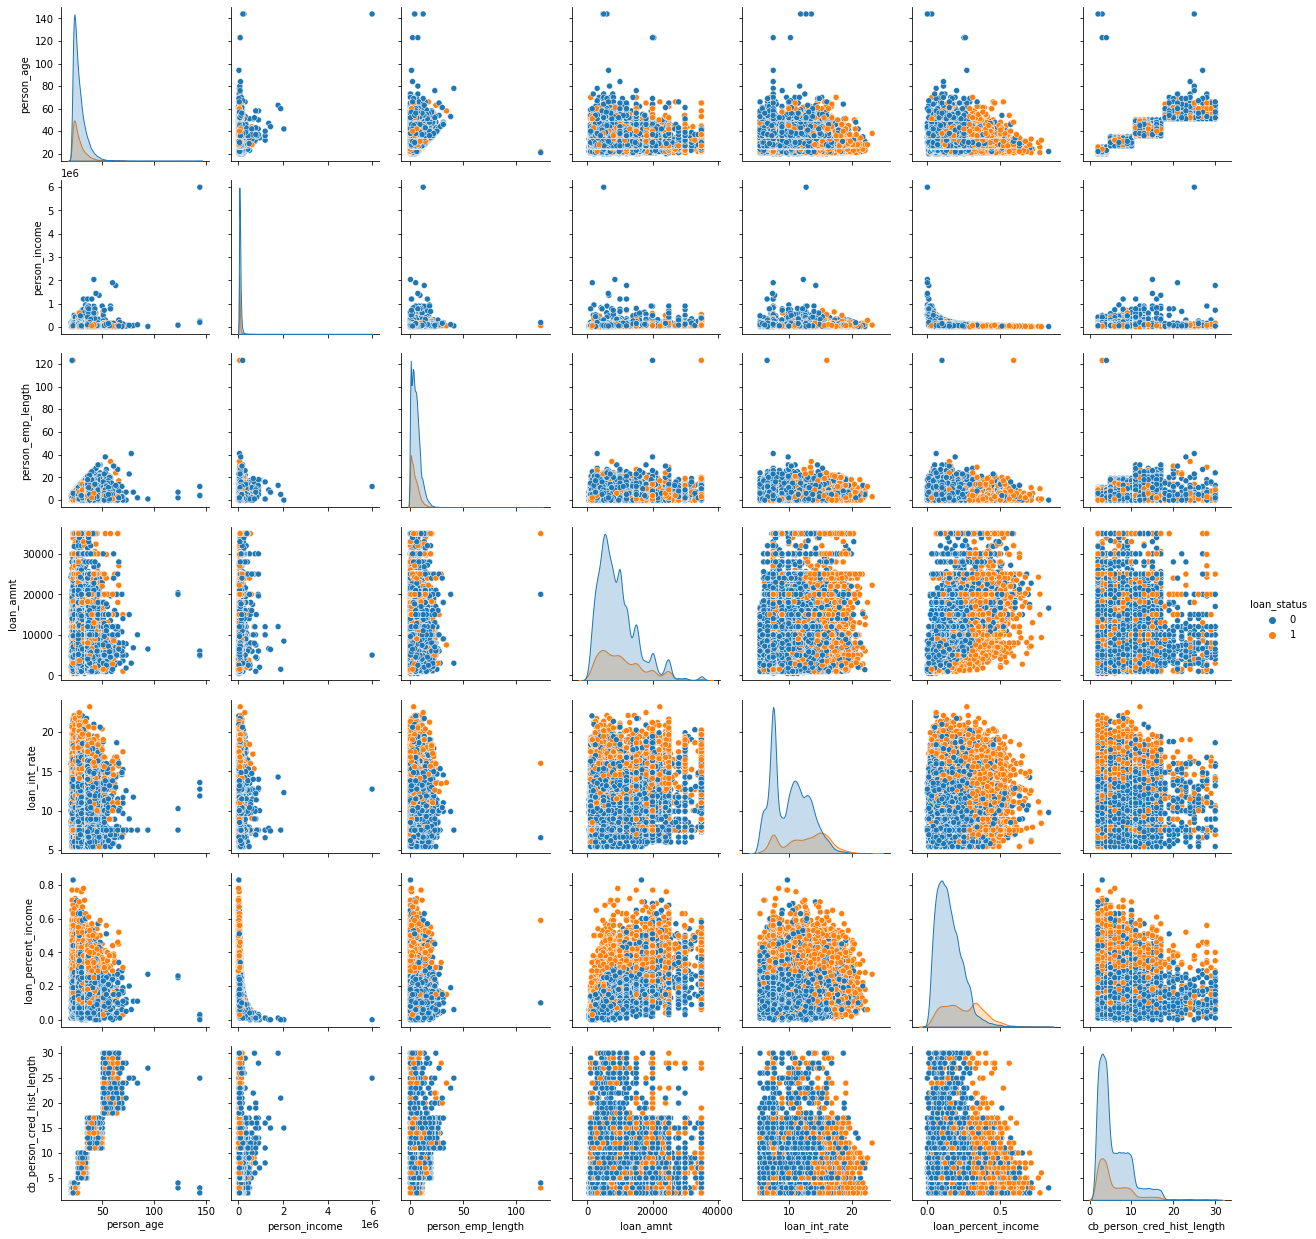

In [23]:
sns.pairplot(df,hue="loan_status");

### Scatter plot

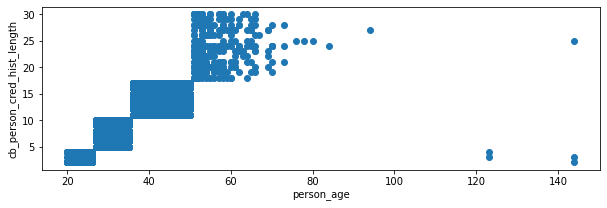

In [24]:
plt.figure(figsize=(10,3))
plt.scatter(x=df['person_age'],y=df['cb_person_cred_hist_length'])
plt.xlabel('person_age')
plt.ylabel('cb_person_cred_hist_length');

**insight**
* By above plot,i observed that person_age and cb_person_cred_hist_length are related to each other i.e, if person_income increases then cb_person_cred_hist_length also increases

### Count plot

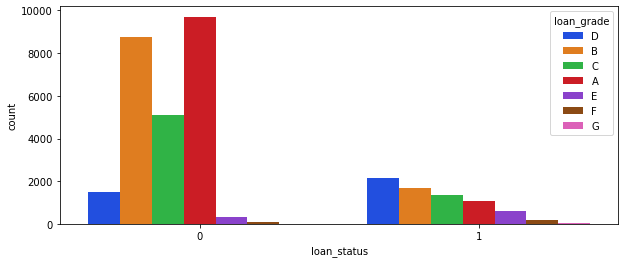

In [25]:
plt.figure(figsize=(10,4))
sns.countplot(data=df,x='loan_status',hue='loan_grade',palette='bright');

**insight**
* By above plot,i observed that loan_status of 0 has highest grade A and B

### Bar Plot

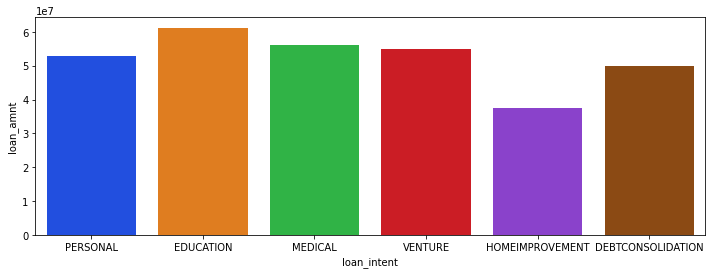

In [26]:
plt.figure(figsize=(12,4))
sns.barplot(x='loan_intent',y='loan_amnt',data=df,ci=None,estimator=np.sum,palette='bright');

**insight**
* By above plot,i observed that loan_amount taken by loan_intent of education is more while compared to others

### Correlation Matrix

In [27]:
corr_matrix=df.corr(method='pearson')
corr_matrix.style.background_gradient(cmap='coolwarm')

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.160520,0.050787,0.008207,-0.021629,-0.042411,0.859133
person_income,0.173202,1.000000,0.142124,0.266820,-0.000142,-0.144449,-0.254471,0.117987
person_emp_length,0.160520,0.142124,1.000000,0.122518,-0.041344,-0.086953,-0.058372,0.141760
loan_amnt,0.050787,0.266820,0.122518,1.000000,0.131582,0.105376,0.572612,0.041967
loan_int_rate,0.008207,-0.000142,-0.041344,0.131582,1.000000,0.305744,0.107762,0.011139
loan_status,-0.021629,-0.144449,-0.086953,0.105376,0.305744,1.000000,0.379366,-0.015529
loan_percent_income,-0.042411,-0.254471,-0.058372,0.572612,0.107762,0.379366,1.000000,-0.031690
cb_person_cred_hist_length,0.859133,0.117987,0.141760,0.041967,0.011139,-0.015529,-0.031690,1.000000


**insight**
* By above plot,i observed that person_age and cb_person_cred_hist_length are directly proportional to each other somewhat where remaining are inversely proportional to each other

### Pie plot

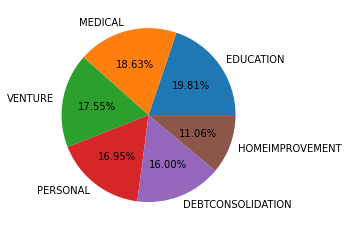

In [28]:
plt.pie(x = df.loan_intent.value_counts().values,
       labels = df.loan_intent.value_counts().index,
       autopct = '%.2f%%');

**insight**
* By above plot, i observed that education loan taken by the customers is 19.78% and it is more while compared to other loans

### Box Plot

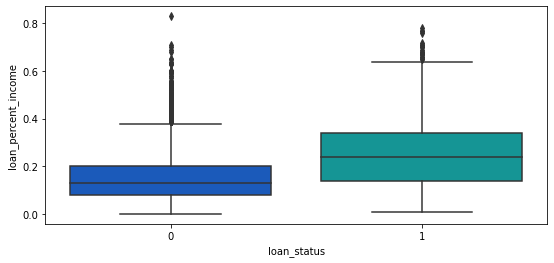

In [29]:
plt.figure(figsize=(9,4))
sns.boxplot(x='loan_status',y='loan_percent_income',data=df,palette='winter');

**insight:**
* By above plot, i observed that outliers are more in both loan_status 0 and 1.